# Handwritten Number Guessing Model

In [1]:
#imports
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import random

#saves the random numbers generated during this seed
np.random.seed(69)

import itertools
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras import optimizers

In [2]:
#checking whether GPU is being utilized
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ",device)

device:  cuda


### Importing Dataset

In [3]:
Images = np.load(r"Images(28x28).npy")
Images = 255 - Images

print(Images[:2])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [4]:
WriterInfo = np.load(r"WriterInfo.npy")
print(WriterInfo)

[[  1   0  29 ...   0   2   1]
 [  1   0  29 ...   0   2   1]
 [  1   0  29 ...   0   2   1]
 ...
 [  0 117  68 ...   1   1   0]
 [  0 117  68 ...   1   1   0]
 [  0 117  68 ...   1   1   0]]


In [5]:
labels = WriterInfo[:, 0]
print(labels)

[1 1 1 ... 0 0 0]


In [6]:
labels.shape

(13580,)

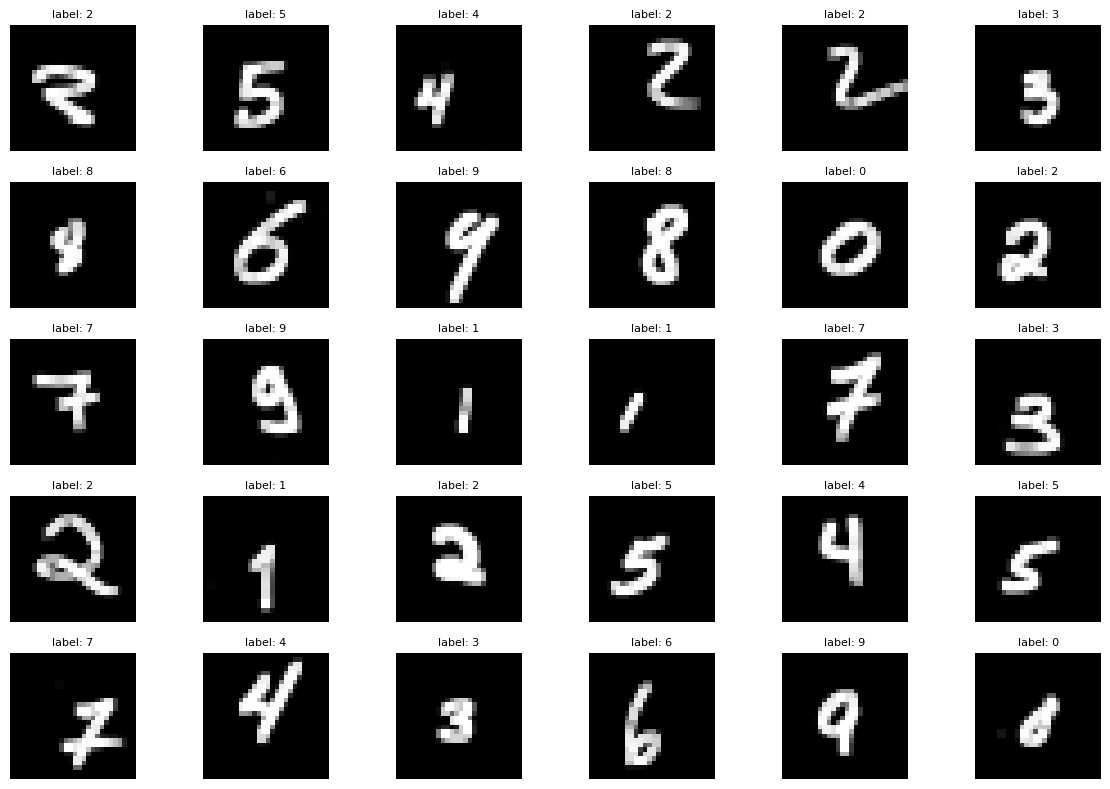

In [7]:
indices = [random.randint(0, len(Images) - 1) for _ in range(30)]

# Grid settings
rows = 5
cols = 6

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Plot each image
for ax, idx in zip(axes.flat, indices):
    ax.imshow(Images[idx], cmap='gray')
    ax.set_title(f"label: {labels[idx]}", fontsize=8)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

### Splitting the Dataset for tarining and testing

In [8]:
# Splitting the testing and training data

X_train, X_test, y_train, y_test = train_test_split(Images, labels, test_size=0.2, random_state=69)
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)
print()
print("Train label: ",y_train.shape)
print("Test label: ",y_test.shape)

Train:  (10864, 28, 28)
Test:  (2716, 28, 28)

Train label:  (10864,)
Test label:  (2716,)


In [9]:
#reshaping CNN
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')/255

### Data cleaning and Normalization

In [10]:
#One hot encoding the labels
digit_number = 10
y_train = keras.utils.to_categorical(y_train, digit_number)
#y_cv = keras.utils.to_categorical(y_cv, digit_number)
y_test = keras.utils.to_categorical(y_test, digit_number)

print("label: ",y_train[0])

label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### CNN Model

In [11]:
#training for CNN
Inp = Input(shape=(28, 28, 1))  # Input as image (not flattened)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(Inp)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(digit_number, activation='softmax')(x)

In [13]:
model = Model(Inp, output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    batch_size = 109,
                    epochs = 100,)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3133 - loss: 1.9373
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7355 - loss: 0.8187
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.5403
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8713 - loss: 0.3899
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8967 - loss: 0.3250
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2584
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9270 - loss: 0.2278
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9349 - loss: 0.1938
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1689
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1477
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9578 - loss: 0.1277
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━

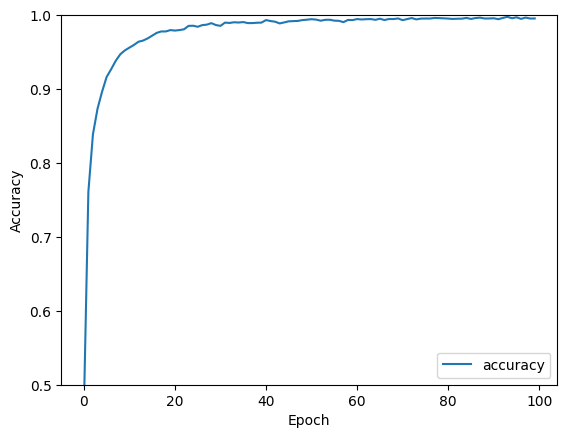

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


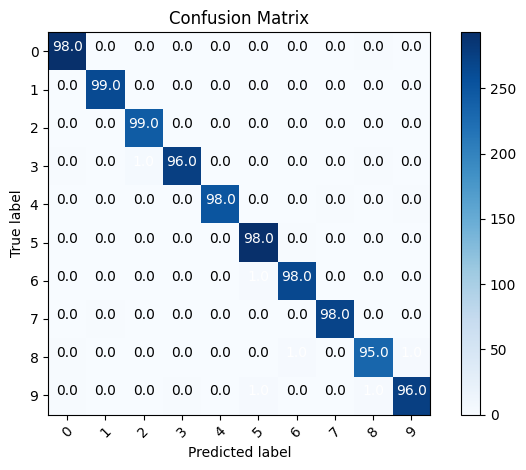

In [17]:
def plot_confusion_matrix(cm, classes, normalize=True,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]),
                                range(cm.shape[1])):
    cm[i,j] = int(cm[i,j]*100)
    plt.text(j, i, cm[i, j],
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(10))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


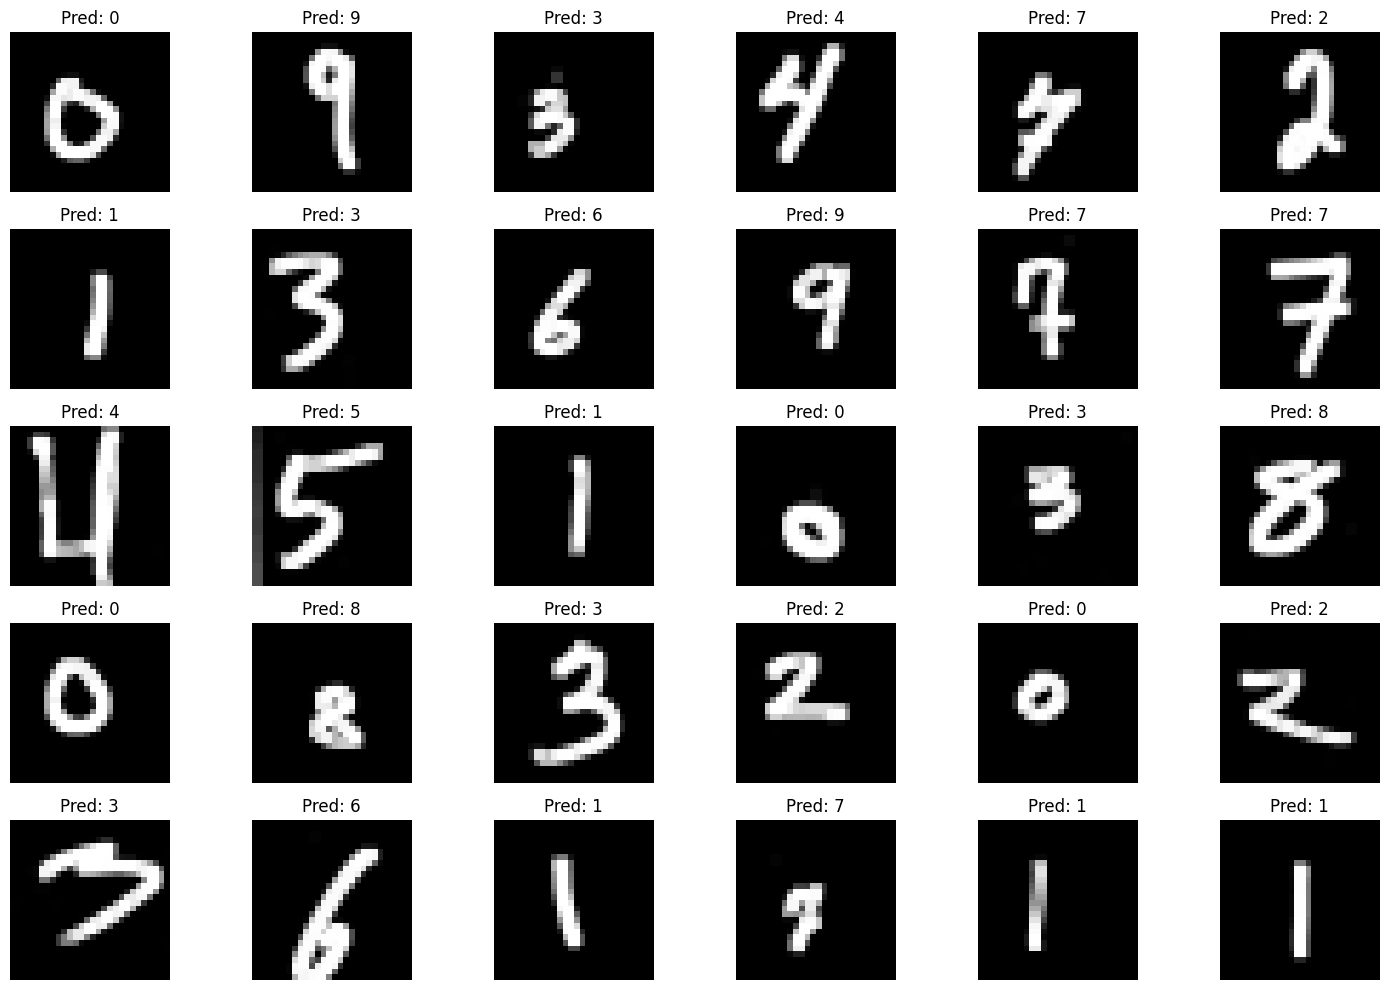

In [19]:
# Testing - make predictions on X_test
test_pred = pd.DataFrame(model.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis=1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns={0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

# Create a grid of 5x6 to display 30 random samples
plt.figure(figsize=(15, 10))
for i in range(30):
    test_index = np.random.randint(0, len(X_test))
    plt.subplot(5, 6, i+1)

    # Reshape the image correctly for display
    img = X_test[test_index].reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {test_pred['Label'][test_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
#downloading model
model.save("HNGM_v2.keras")

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


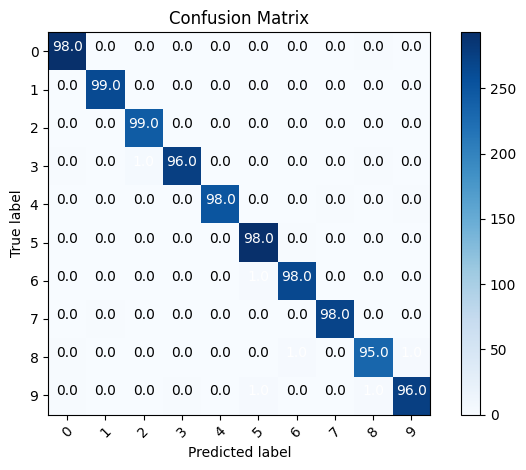

In [23]:
#checking data_set
model_check = keras.models.load_model("HNGM_v2.keras")

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(10))